In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml("mnist_784", version=1)
X,y = mnist.data, mnist.target

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


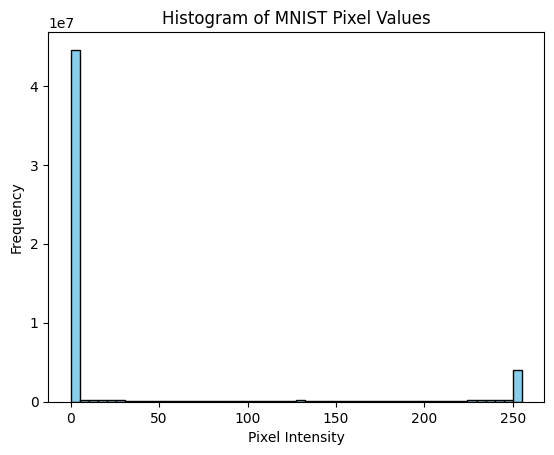

In [66]:
import matplotlib.pyplot as plt

# Flatten all pixel values into one array
pixel_values = X.values.flatten()

plt.hist(pixel_values, bins=50, color='skyblue', edgecolor='black')
plt.title("Histogram of MNIST Pixel Values")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

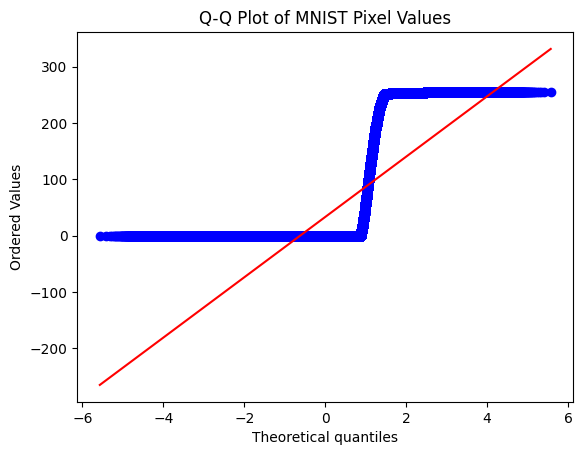

In [68]:
# import scipy.stats as stats

# stats.probplot(pixel_values, dist="norm", plot=plt)
# plt.title("Q-Q Plot of MNIST Pixel Values")
# plt.show()

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_scaled)

In [6]:
x_pca

array([[-0.89171985, -4.9297109 ],
       [ 8.81353003, -7.51756046],
       [ 2.20483541,  9.82446089],
       ...,
       [-5.22259497, -1.18431579],
       [-2.17772858, -6.99503251],
       [11.77787167, -5.40298122]])

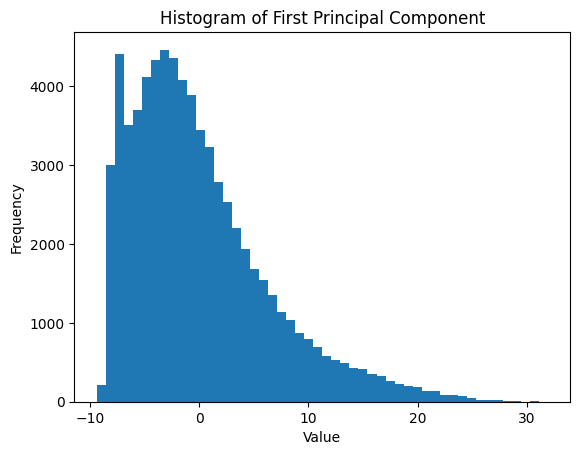

In [64]:
import matplotlib.pyplot as plt

plt.hist(x_pca[:, 0], bins=50)
plt.title("Histogram of First Principal Component")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# For Visualization

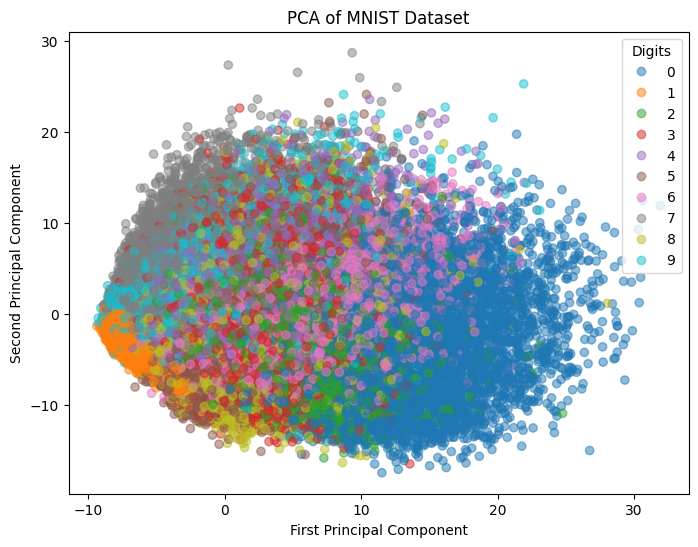

In [8]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c=y.astype(int), cmap="tab10", alpha=0.5)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA of MNIST Dataset")
plt.show()

In [9]:
print(pca.explained_variance_ratio_)

[0.05642719 0.04041226]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [26]:
clf = LogisticRegression(multi_class="multinomial")
clf.fit(X_train, y_train)

C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\atifs\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [30]:
y_pred = clf.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [34]:
print(accuracy_score(y_test, y_pred))

0.9232142857142858


In [36]:
print(confusion_matrix(y_test, y_pred))

[[1358    0    5    1    3    9    8    4    4    4]
 [   0 1505    6    5    1    7    1    7   15    2]
 [   6   20 1227   24   13    8   22   17   31    2]
 [   8    8   29 1301    1   47    6   14   32   11]
 [   3    8   11    6 1258    0   14    4   10   49]
 [   9    8    8   44   12 1100   29    9   31    9]
 [   7    3   14    2   11   14 1381    2    2    2]
 [   7    3   14    8   13    3    1 1364    6   46]
 [  11   24   18   33    3   41    8    3 1174   18]
 [   6    3    3   16   32   17    0   26   10 1257]]
